In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 1. Φορτώνουμε το TensorFlow Flowers Dataset
url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
dataset_dir = tf.keras.utils.get_file('flower_photos', url, untar=True)

# 2. Δημιουργία ImageDataGenerators για Εκπαίδευση και Επικύρωση
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Κανονικοποίηση εικόνας
    shear_range=0.2,  # Κλίση
    zoom_range=0.2,   # Μεγέθυνση
    horizontal_flip=True,  # Οριζόντια αναστροφή
    rotation_range=40,     # Περιστροφή
    width_shift_range=0.2, # Οριζόντια μετατόπιση
    height_shift_range=0.2 # Κατακόρυφη μετατόπιση
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    dataset_dir + '/flower_photos',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')  # Πολυκατηγορική ταξινόμηση

validation_generator = test_datagen.flow_from_directory(
    dataset_dir + '/flower_photos',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

# 3. Δημιουργία του Μοντέλου με Transfer Learning (MobileNetV2)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Παγώνουμε τα επίπεδα του MobileNetV2 για να εκπαιδεύσουμε μόνο τα νέα επίπεδα
base_model.trainable = False

# Δημιουργία του μοντέλου
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout για αποφυγή overfitting
    layers.Dense(5, activation='softmax')  # 5 κατηγορίες λουλουδιών
])

# 4. Συμπύκνωση του μοντέλου
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Εκπαίδευση του μοντέλου
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # Βήματα ανά εποχή
    epochs=20,  # Αύξηση των εποχών για καλύτερη εκπαίδευση
    validation_data=validation_generator,
    validation_steps=50)  # Επαλήθευση σε 50 βήματα

# 6. Αξιολόγηση του Μοντέλου
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print(f'\nTest accuracy: {test_acc}')

Found 3670 images belonging to 5 classes.
Found 3670 images belonging to 5 classes.


/var/folders/9_/0tyxd1bx3xvgh39p_jbkksf00000gp/T/ipykernel_1133/1293017832.py:37: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 191ms/step - accuracy: 0.5091 - loss: 1.3095 - val_accuracy: 0.8169 - val_loss: 0.5234
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.7414 - loss: 0.7099 - val_accuracy: 0.8394 - val_loss: 0.4673
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 147ms/step - accuracy: 0.7498 - loss: 0.6864 - val_accuracy: 0.8766 - val_loss: 0.3623
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.7788 - loss: 0.5810 - val_accuracy: 0.8537 - val_loss: 0.3938
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - accuracy: 0.7828 - loss: 0.5746 - val_accuracy: 0.8763 - val_loss: 0.3591
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7854 - loss: 0.5467 - val_accuracy: 0.8596 - val_loss: 0.3553
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 186ms/step - accuracy: 0.8144 - loss: 0.4937 - val_accuracy: 0.8813 - val_loss: 0.3314
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.8247 - loss: 0.5092 - 

2024-11-17 09:30:17.336937: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.8171 - loss: 0.4720 - val_accuracy: 0.8731 - val_loss: 0.3436
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 206ms/step - accuracy: 0.8169 - loss: 0.4806 - val_accuracy: 0.8856 - val_loss: 0.3069
Epoch 12/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8404 - loss: 0.4721 - val_accuracy: 0.8723 - val_loss: 0.3247
Epoch 13/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 206ms/step - accuracy: 0.8301 - loss: 0.4652 - val_accuracy: 0.8925 - val_loss: 0.3080
Epoch 14/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.8323 - loss: 0.4420 - val_accuracy: 0.8881 - val_loss: 0.3209
Epoch 15/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 156ms/step - accuracy: 0.8251 - loss: 0.4530 - val_accuracy: 0.9000 - val_loss: 0.2713
Epoch 16/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.8351 - loss: 0.4523 - val_accuracy: 0.8838 - val_loss: 0.3119
Epoch 17/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 206ms/step - accuracy: 0.8386 - loss: 0.4356 - val_

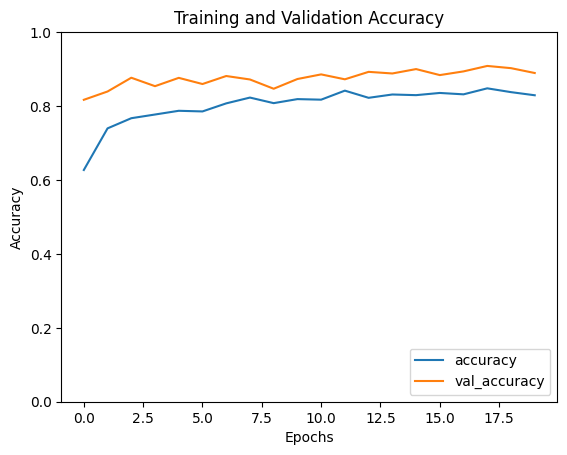

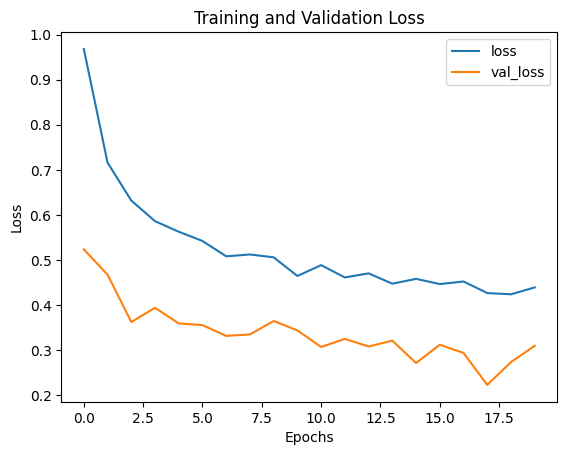

In [6]:
# 7. Απεικόνιση της ακρίβειας και της απώλειας κατά τη διάρκεια της εκπαίδευσης
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

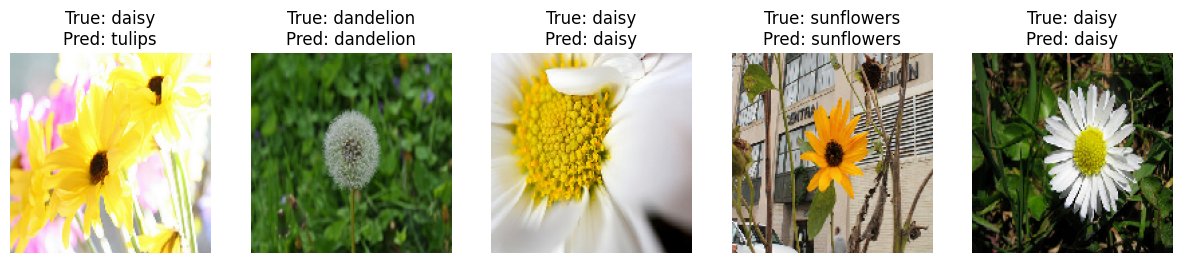

In [12]:
# Συνάρτηση για Εμφάνιση Προβλέψεων
def show_predictions(generator, model, n=5):
    """
    Εμφάνιση n εικόνων από τον validation_generator με τις προβλέψεις του μοντέλου.
    Parameters:
        generator: Ο validation generator.
        model: Το εκπαιδευμένο μοντέλο.
        n: Ο αριθμός των εικόνων που θα εμφανιστούν.
    """
    class_names = list(generator.class_indices.keys())  # Ονόματα κατηγοριών
    plt.figure(figsize=(15, 15))

    for i in range(n):
        # Λήψη εικόνας και πραγματικής ετικέτας
        img, label = next(generator)  # Παίρνει batch από τον generator
        img = img[0]  # Παίρνει την πρώτη εικόνα του batch
        label = label[0]  # Παίρνει την πρώτη ετικέτα του batch
        
        # Πρόβλεψη κατηγορίας
        prediction = model.predict(img[None, ...], verbose=0)  # Προσθήκη batch axis
        predicted_label = class_names[tf.argmax(prediction[0]).numpy()]
        true_label = class_names[tf.argmax(label).numpy()]

        # Εμφάνιση εικόνας
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.title(f"True: {true_label}\nPred: {predicted_label}")
        plt.axis('off')
    plt.show()

# Χρήση της συνάρτησης για Εμφάνιση Προβλέψεων
show_predictions(validation_generator, model, n=5)


